In [128]:
import pandas as pd
import hvplot
import numpy as np
%store -r file_dict

<AxesSubplot:xlabel='date'>

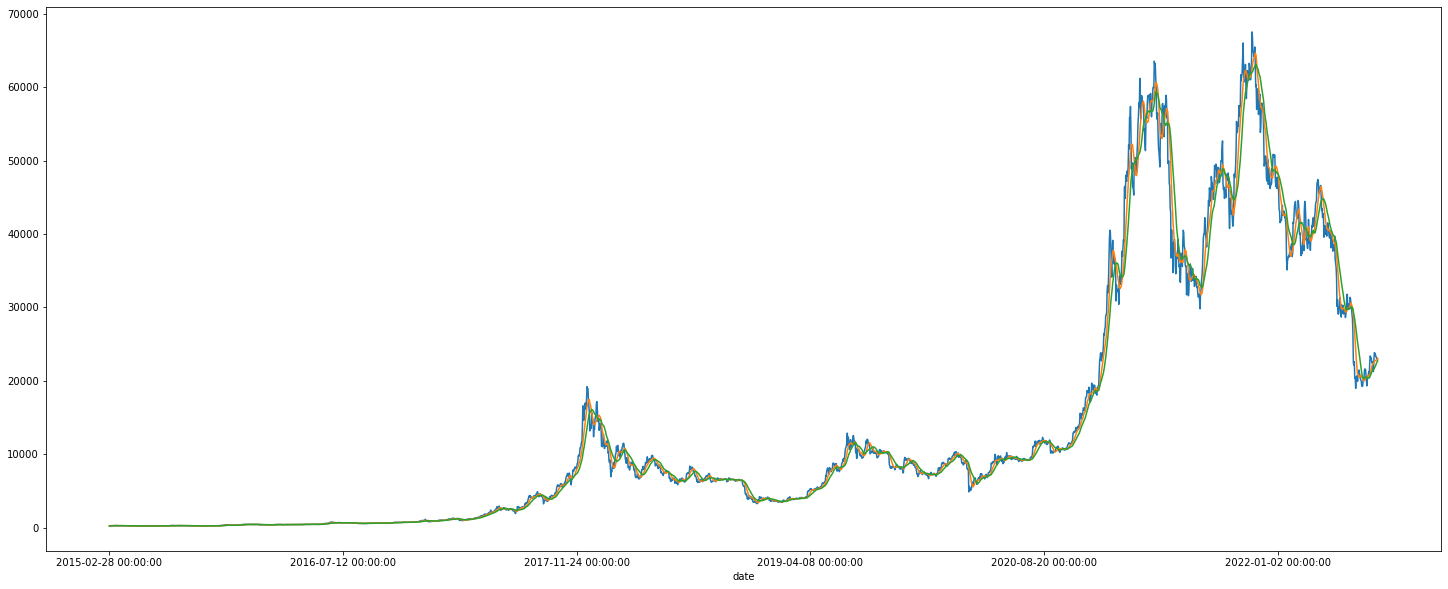

In [129]:
day_df = pd.DataFrame(file_dict['BTC.csv'])
day_df = day_df.sort_values(by='date')
day_df['rolling_10_day_btc'] = day_df['close'].rolling(window=10).mean()
day_df['rolling_20_day_btc'] = day_df['close'].rolling(window=20).mean()
day_df = day_df.dropna()
ax = day_df['close'].plot(figsize=(25,10))
day_df['rolling_10_day_btc'].plot(ax=ax)
day_df['rolling_20_day_btc'].plot(ax=ax)

In [130]:
day_df = day_df.drop(['unix','open','high','low'], axis=1)

In [136]:
#day_df = day_df.columns = day_df.loc[0]
day_df.columns = ['symbol','close','Volume USD','Volume BTC','rolling_10_day_btc','rolling_20_day_btc']
day_df.drop(index=day_df.index[0],axis=0, inplace=True)
day_df

,symbol,close,Volume USD,Volume BTC,rolling_10_day_btc,rolling_20_day_btc
date,,,,,,
2015-03-02 00:00:00,BTC/USD,275.990000,9.448438e+06,35351.140000,248.541000,242.867000
2015-03-03 00:00:00,BTC/USD,283.200000,2.115789e+07,75940.040000,252.351000,246.067500
2015-03-04 00:00:00,BTC/USD,273.740000,1.983372e+07,71328.670000,256.066000,248.624500
2015-03-05 00:00:00,BTC/USD,278.510000,1.828154e+07,67235.690000,259.944000,250.750000
2015-03-06 00:00:00,BTC/USD,273.890000,1.108390e+07,40490.630000,263.365000,251.538500
...,...,...,...,...,...,...
2022-07-31 00:00:00,BTC/USD,23294.000000,7.329680e+07,3146.595788,22776.443245,22146.036616
2022-08-01 00:00:00,BTC/USD,23256.431307,1.297409e+08,5578.709695,22833.986376,22343.331508
2022-08-02 00:00:00,BTC/USD,22986.000000,9.698831e+07,4219.451219,22887.786376,22480.331508


In [139]:
profitable_days = []

profitable_days.append(day_df[day_df['rolling_10_day_btc'] > day_df['rolling_20_day_btc']])
#    print(day_df['rolling_10_day_btc'] > day_df['rolling_20_day_btc'])
#ax2 = profitable_days['close'].plot(figsize=(25,10))
#profitable_days['rolling_10_day_btc'].plot(ax2=ax2)
#profitable_days['rolling_20_day_btc'].plot(ax2=ax2)
#np.zeros(profitable_days)[0,:,:]
#profitable_days_df = pd.DataFrame(profitable_days)

In [144]:
#profitable_days = pd.DataFrame(profitable_days)
profitable_days

[                      symbol         close    Volume USD    Volume BTC  \
 date                                                                     
 2015-03-02 00:00:00  BTC/USD    275.990000  9.448438e+06  35351.140000   
 2015-03-03 00:00:00  BTC/USD    283.200000  2.115789e+07  75940.040000   
 2015-03-04 00:00:00  BTC/USD    273.740000  1.983372e+07  71328.670000   
 2015-03-05 00:00:00  BTC/USD    278.510000  1.828154e+07  67235.690000   
 2015-03-06 00:00:00  BTC/USD    273.890000  1.108390e+07  40490.630000   
 ...                      ...           ...           ...           ...   
 2022-07-31 00:00:00  BTC/USD  23294.000000  7.329680e+07   3146.595788   
 2022-08-01 00:00:00  BTC/USD  23256.431307  1.297409e+08   5578.709695   
 2022-08-02 00:00:00  BTC/USD  22986.000000  9.698831e+07   4219.451219   
 2022-08-03 00:00:00  BTC/USD  22813.873707  1.083055e+08   4747.351281   
 2022-08-04 00:00:00  BTC/USD  22969.000000  1.247936e+06     54.331300   
 
                      r

In [147]:
profitable_df = []
for each in profitable_days.index:
    profitable_df.append(file_dict[each].value)
profitable_df

TypeError: 'builtin_function_or_method' object is not iterable